# Quad

In [1]:
import numpy as np
from fermi_sim import *
from scipy import sparse
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

Def a Hamiltonian: $$H = \sum\limits_{i<j} c_i\dagger c_j + c_j\dagger c_i$$ 


In [2]:
#The Hamiltonian of the four site on the center (bulk) when the coupling inside the unit cells is 0.
def Quadrat(k):
    
    H = sparse.csr_matrix((2**4, 2**4), dtype=float)
    
    H += create_op(4,1).dot(annihil_op(4,2))
    H += create_op(4,2).dot(annihil_op(4,1))
    
    H += create_op(4,2).dot(annihil_op(4,2**3))
    H += create_op(4,2**3).dot(annihil_op(4,2))
    
    H += create_op(4,1).dot(annihil_op(4,2**2))
    H += create_op(4,2**2).dot(annihil_op(4,1))
    
    H += -create_op(4,2**3).dot(annihil_op(4,2**2))
    H += -create_op(4,2**2).dot(annihil_op(4,2**3))
    
    return H 

In [3]:
H_Quad = Quadrat(0)

In [4]:
E, v = np.linalg.eigh(H_Quad.toarray())

In [5]:
print(E)

[-2.82842712e+00 -1.41421356e+00 -1.41421356e+00 -1.41421356e+00
 -1.41421356e+00 -1.19285394e-17 -2.71050543e-20  0.00000000e+00
  0.00000000e+00  1.73386916e-17  1.41518581e-16  1.41421356e+00
  1.41421356e+00  1.41421356e+00  1.41421356e+00  2.82842712e+00]


In [6]:
num_op1 = number_op(4, 1)
num_op2 = number_op(4, 2)
num_op3 = number_op(4, 4)
num_op4 = number_op(4, 8)

In [13]:
v_test = v[:,0]
v_test = create_op(4,1).dot(v_test)
v_test /= np.linalg.norm(v_test)

In [16]:
np.vdot(v_test, num_op1.dot(v_test))

1.0

In [17]:
np.vdot(v_test, num_op2.dot(v_test))

0.7499999999999998

In [18]:
np.vdot(v_test, num_op3.dot(v_test))

0.7499999999999998

In [19]:
np.vdot(v_test, num_op4.dot(v_test))

0.5000000000000004

In [20]:
np.vdot(v_test, H_Quad.dot(v_test))

-1.4142135623730951

In [14]:
def quench(H, v, dτ, nsteps, numeroprator):
    
    v /= np.linalg.norm(v)
    
    num_traj = np.zeros(nsteps)
    num_traj[0] = np.vdot(v,  numeroprator.dot(v)).real
    for n in range(1, nsteps):
        v = spla.expm_multiply(-(1j)*(dτ)*H, v)
        #v /= np.linalg.norm(v)
        num_traj[n] = np.vdot((v),  numeroprator.dot(v)).real
        
    plt.plot(dτ*np.arange(nsteps), num_traj)
    #plt.plot(dτ*np.arange(nsteps), num_traj1)
    plt.show()

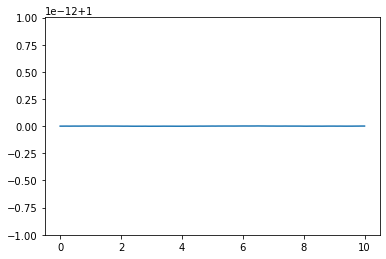

In [15]:
quench(H_Quad, v_test, 0.1, 101, num_op1)

In [31]:
np.linalg.norm(v_test + H_Quad.dot(v_test)/np.linalg.norm(H_Quad.dot(v_test)))
# Cdagger .dot |ground> is eigenstate.

8.3820000221454525e-16

In [30]:
v_test1 = v[:,0]
v_test1 = create_op(4,8).dot(v_test1)
v_test1 /= np.linalg.norm(v_test1)
np.linalg.norm(v_test1 + H_Quad.dot(v_test1)/np.linalg.norm(H_Quad.dot(v_test1)))

8.3820000221454525e-16

In [6]:
np.exp(-15)

3.059023205018258e-07

In [43]:
np.exp(-0.1*2000/32)

0.0019304541362277093

In [27]:
np.exp(-1000*0.1/16)

0.0019304541362277093

In [28]:
np.exp(-0.1*1000/20)

0.006737946999085467

In [14]:
s = np.zeros(3001)
for i in range(1,3001):
    s[i] = np.exp(-i*0.1/20)

In [17]:
for i in range (2000,2050):
    print(s[i])

4.5399929762484854e-05
4.517349666814366e-05
4.494819291357196e-05
4.472401286616424e-05
4.4500950921407545e-05
4.427900150274157e-05
4.405815906141936e-05
4.383841807636846e-05
4.361977305405265e-05
4.3402218528335126e-05
4.3185749060341275e-05
4.297035923832319e-05
4.275604367752418e-05
4.254279702004391e-05
4.233061393470499e-05
4.2119489116919155e-05
4.190941728855483e-05
4.170039319780564e-05
4.14924116190583e-05
4.128546735276242e-05
4.1079555225300724e-05
4.0874670088859145e-05
4.0670806821298684e-05
4.04679603260271e-05
4.02661255318713e-05
4.006529739295107e-05
3.9865470888552325e-05
3.966664102300212e-05
3.9468802825543534e-05
3.927195135021125e-05
3.907608167570808e-05
3.888118890528201e-05
3.86872681666037e-05
3.8494314611644456e-05
3.8302323416555486e-05
3.8111289781546776e-05
3.792120893076757e-05
3.773207611218676e-05
3.754388659747391e-05
3.735663568188146e-05
3.7170318684126734e-05
3.6984930946274927e-05
3.680046783362321e-05
3.661692473458402e-05
3.643429706057027e-05

In [18]:
3.571284964163521e-05 - 3.553473106095892e-05

1.7811858067629492e-07

In [19]:
1/5000

0.0002

In [30]:
from Hamiltonian_topo import *

In [33]:
sparse.linalg.eigsh(H_Quad_topo((2,2),0,5), which = 'SA', k =1)

(array([-34.14213562]),
 array([[-6.82392044e-19],
        [-2.60804301e-18],
        [ 3.41543640e-18],
        ...,
        [ 7.92282244e-19],
        [ 2.82174987e-18],
        [-1.30437041e-18]]))

In [36]:
sparse.linalg.eigsh(H_Quad_topo((2,2),0,5)+ sup_normal((2,2)), which = 'SA', k =9)

(array([-35.88779774, -35.67618565, -35.63078743, -35.60209954,
        -35.55637142, -35.41917534, -35.39048745, -35.34508923,
        -35.34475933]),
 array([[-3.14844798e-05,  5.66783552e-18, -5.86918193e-18, ...,
          9.70132560e-05,  7.51995851e-18,  2.89346455e-17],
        [-8.72224870e-18,  6.57225847e-06,  1.97676659e-05, ...,
         -8.57120688e-19, -7.29000114e-19, -1.74537494e-18],
        [-2.09027138e-17,  2.75488256e-04, -2.49506556e-06, ...,
         -9.23722263e-18, -1.00748856e-18, -2.30753067e-19],
        ...,
        [ 1.32084823e-17, -2.75488256e-04, -2.49506556e-06, ...,
          9.12839488e-18, -9.71993944e-19,  9.40301523e-18],
        [ 2.78994255e-18, -6.57225847e-06,  1.97676659e-05, ...,
         -2.29302551e-18,  4.68724901e-20, -1.15669741e-18],
        [-3.14844798e-05,  3.89479160e-18, -6.09829551e-18, ...,
          9.70132560e-05,  1.18609494e-17,  3.81842453e-17]]))

In [37]:
-35.88779774 - -35.67618565

-0.2116120900000027

In [46]:
np.exp(-0.1/50)

0.9980019986673331

In [48]:
np.exp(-0.1*5000/50)

4.5399929762484854e-05